# Principal Components Analysis Lab  
  
  
##### From Introduction to Statistical Learning

In this lab, we'll perform PCA on the `USArrests` data set. The rows of the data set contain the 50 states, in alphabetical order.

In [1]:
states <- row.names(USArrests)
states

[1] "Alabama"        "Alaska"         "Arizona"        "Arkansas"      
 [5] "California"     "Colorado"       "Connecticut"    "Delaware"      
 [9] "Florida"        "Georgia"        "Hawaii"         "Idaho"         
[13] "Illinois"       "Indiana"        "Iowa"           "Kansas"        
[17] "Kentucky"       "Louisiana"      "Maine"          "Maryland"      
[21] "Massachusetts"  "Michigan"       "Minnesota"      "Mississippi"   
[25] "Missouri"       "Montana"        "Nebraska"       "Nevada"        
[29] "New Hampshire"  "New Jersey"     "New Mexico"     "New York"      
[33] "North Carolina" "North Dakota"   "Ohio"           "Oklahoma"      
[37] "Oregon"         "Pennsylvania"   "Rhode Island"   "South Carolina"
[41] "South Dakota"   "Tennessee"      "Texas"          "Utah"          
[45] "Vermont"        "Virginia"       "Washington"     "West Virginia" 
[49] "Wisconsin"      "Wyoming"

The columns of the data set contain four variables.

In [2]:
names(USArrests)

[1] "Murder"   "Assault"  "UrbanPop" "Rape"

First, we'll briefly examine the data. We notice that the variables have vastly different means.

In [3]:
apply(USArrests, 2, mean)

Murder  Assault UrbanPop     Rape 
   7.788  170.760   65.540   21.232

We see above that there are on average roughly three times as many rapes as murders, and more than eight times as many assaults as rapes. We can also check the variance of the vars by again using the `apply()` function.

In [4]:
apply(USArrests, 2, var)

Murder    Assault   UrbanPop       Rape 
  18.97047 6945.16571  209.51878   87.72916

The variables also have vastly different variances. The `UrbanPop` variable measures the percentage of the population in each state living in an urban area, which is not a comparable number to the number of rapes in each sttate per 100,000 residents. If we failed to scale the variables before applying PCA, then most of the principal components thatt we observed would be drivven by the assault variable, since it has by far the largest mean and variance. Thus, it's important to standardize the variables to have mean zero and standard deviation one before we apply PCA.  
  
  We now perform PCA using the `prcomp()` function, which is one of the several functions in `R` that perform PCA.

In [14]:
pr.out <- prcomp(USArrests, scale=TRUE)

By default, the `prcomp()` function centers the variables to have mean zero. Using the option `scale=TRUE` scales the variable to have standard deviation one. The output contains a number of useful quantities.

In [6]:
names(pr.out)

[1] "sdev"     "rotation" "center"   "scale"    "x"

The `center` and `scale` attributes correspond to the means and standard deviations of the variables that were used for scaling prior to implementing PCA.

In [7]:
pr.out$center

Murder  Assault UrbanPop     Rape 
   7.788  170.760   65.540   21.232

In [8]:
pr.out$scale^2

Murder    Assault   UrbanPop       Rape 
  18.97047 6945.16571  209.51878   87.72916

Unsurprisingly, these values match with what we saw above.  
  
  
  The `rotation` matrix provides the principal component loadings. Each column of `pr.out$rotation` contains the corresponding principal component loading vector. It is called the rotatioon matrix because when we multiply the **X** matrix by `pr.out$rotation`, it gives us the coordinates of the data in the rotated coordinate system. These coordinates are the principal component scores.

In [9]:
pr.out$rotation

,PC1,PC2,PC3,PC4
Murder,-0.5358995,0.4181809,-0.3412327,0.64922780
Assault,-0.5831836,0.1879856,-0.2681484,-0.74340748
UrbanPop,-0.2781909,-0.8728062,-0.3780158,0.13387773
Rape,-0.5434321,-0.1673186,0.8177779,0.08902432


We see that there are four distinct principal components. This is to be expected, because there are in general $min(n-1, p)$ informative principal components in a data set with $n$ observations and $p$ predictors.

Using the `prcomp()` function, we do not need to explicitly multiply the data by the principal component loading vectors in order to obtain the principal component score vectors. Rather the $50 \times 4$ matrix `x` has as its columns the principal component score vectors. That is, the $k$th column is the $k$th principal component score vector. 

In [10]:
dim(pr.out$x)

[1] 50  4

We can plot the first two principal components as follows:

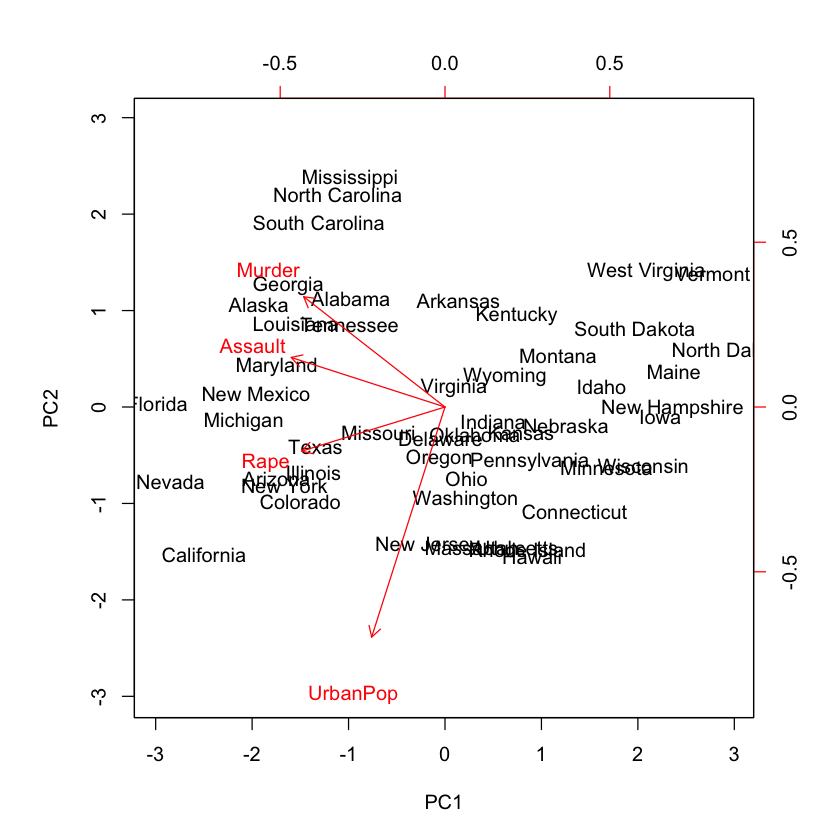

In [11]:
biplot(pr.out, scale=0)

The `scale=0` argument to `biplot()` ensures that the arrows are scaled to represent the loadings. Other values of `scale` give slightly different biplots with different interpretations.  
  
  Notice that this figure is a mirror image of Figure 10.1 from the textbook. Recall that the principal components are only unique up to a sign change (since sign has no effect on the direction of a vector). We can flip the figure by making a few small changes:

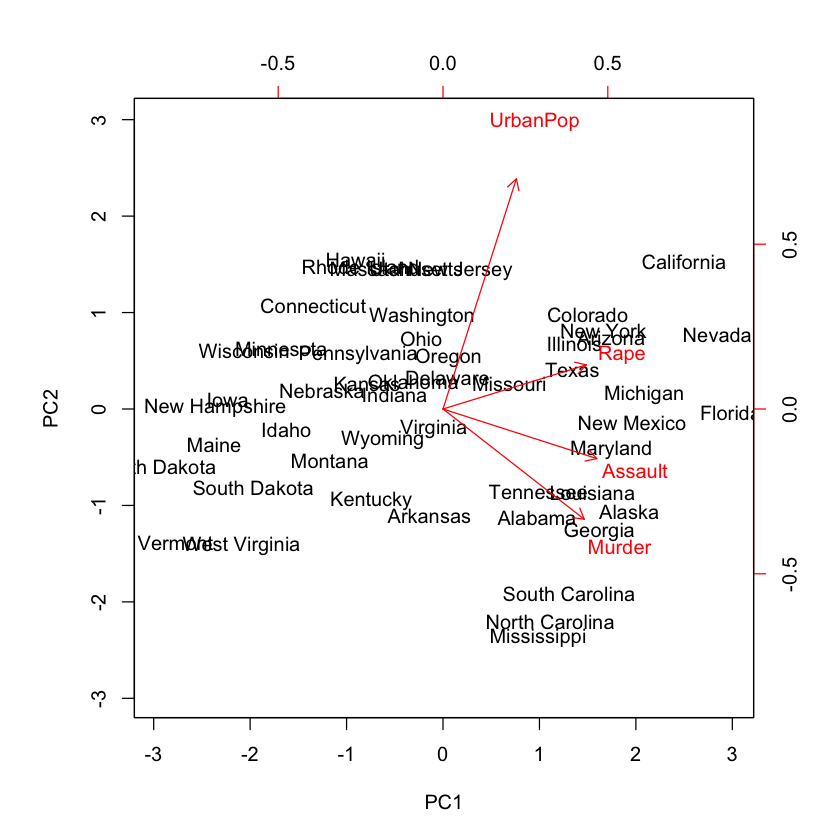

In [15]:
pr.out$rotation <- -pr.out$rotation
pr.out$x <- -pr.out$x
biplot(pr.out, scale=0)

The `prcomp()` function also outputs the standard deviation of each principal component. For instance, on the `USArrests` data set, we can access these standard deviations as follows:

In [16]:
pr.out$sdev

[1] 1.5748783 0.9948694 0.5971291 0.4164494

In [17]:
# Square them to get the variance
pr.var <- pr.out$sdev^2
pr.var

[1] 2.4802416 0.9897652 0.3565632 0.1734301

To compute the proportion of variance explained by each principal component, we simply divide the variance explained by each principal component by the total variance explained by all four principal components.

In [41]:
pve <- pr.var/sum(pr.var)
pve

[1] 0.62006039 0.24744129 0.08914080 0.04335752

In [42]:
sum(pve)

[1] 1

We see above that the first principal component explains 62% of the overall variance in the data, the next principal component explains 24.7% of the overall variance, and so on and so forth. We can plot the proportion of variance explained by each component, as well as the cumulative PVE, as follows:

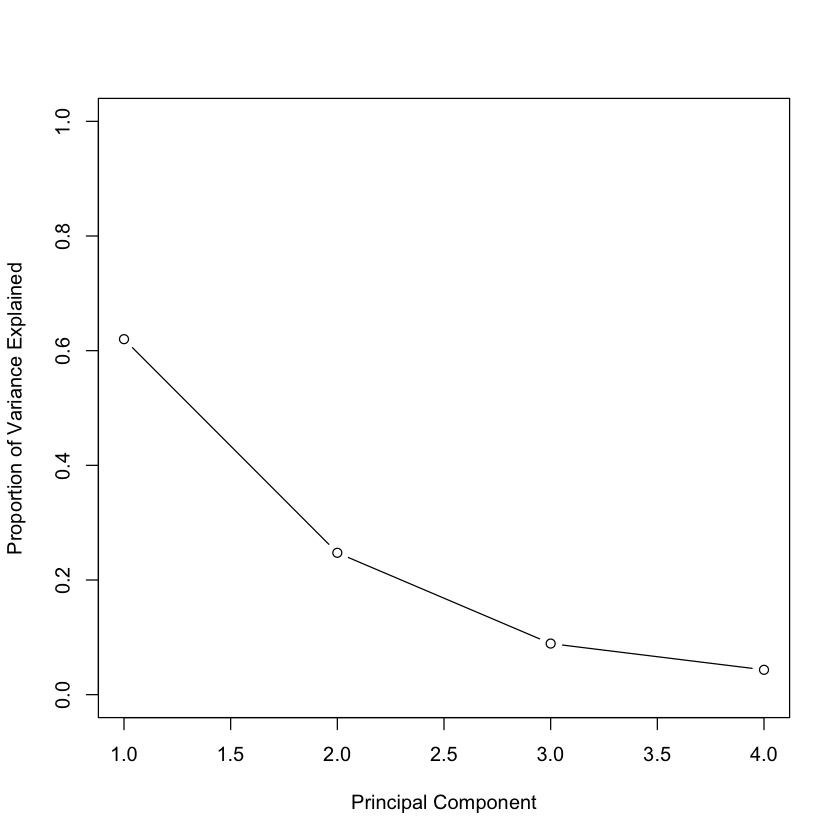

In [43]:
plot(pve, xlab='Principal Component', ylab='Proportion of Variance Explained', ylim = c(0,1), type='b')

We can use the `cumsum()` function to compute the cumulative proportion of variance explained. Generally, `cumsum()` computes the cumulative sum of the elements of a vector. For example:

In [46]:
x <- c(1, 6, 9, -4)
cumsum(x)

[1]  1  7 16 12

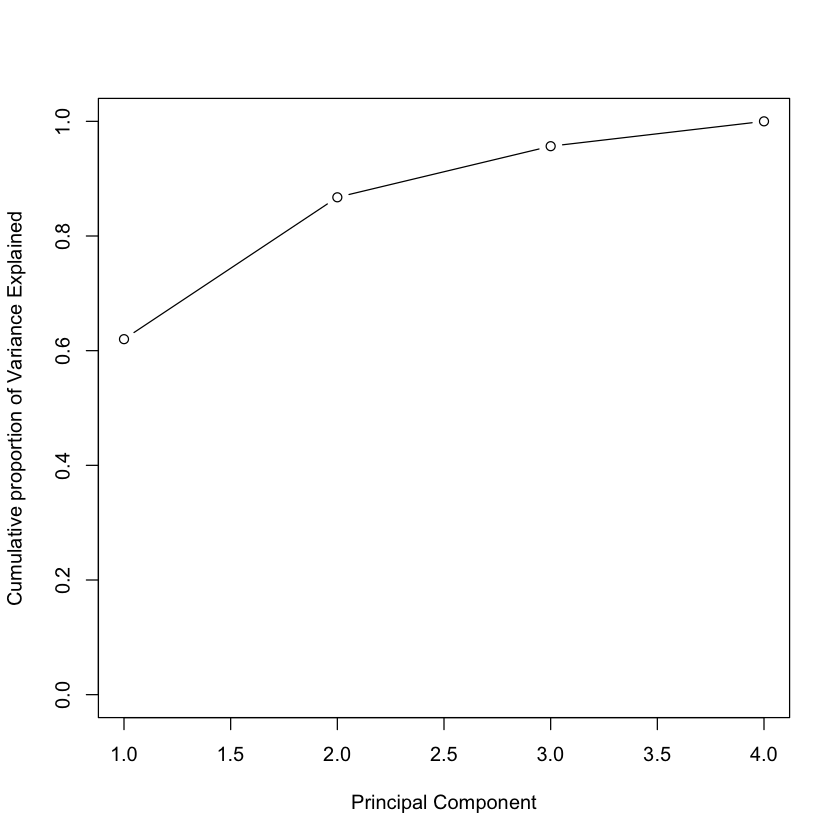

In [45]:
plot(cumsum(pve), xlab='Principal Component', ylab='Cumulative proportion of Variance Explained',
    ylim=c(0, 1), type='b')